In [25]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

In [2]:
df = pd.read_csv("C:\\Users\\silviu\\OneDrive\\Desktop\\car-price.csv")
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [3]:
#Data Cleaning
df = df[['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type','Vehicle Style','highway MPG','city mpg','MSRP']]
df

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [4]:
df.columns = df.columns.str.replace(" ","_").str.lower()
df.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'msrp'],
      dtype='object')

In [5]:
df = df.fillna(0)
df.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [6]:
numerical = ['year','engine_hp','engine_cylinders','highway_mpg','city_mpg']
categorical = ['make','model','transmission_type','vehicle_style']
df = df.rename(columns={'msrp':'price'})
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [7]:
df['above_average'] = df.price >= df.price.mean()
df['above_average'] = df['above_average'].astype(int)
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920,1


In [8]:
#Splitting the data
df_full_train, df_test = train_test_split(df,test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)

y_train = df_train['above_average'].values
y_val = df_val['above_average'].values
y_test  = df_test['above_average'].values
y_full_train = df_full_train['above_average'].values

del df_train['price']
del df_test['price']
del df_val['price']

del df_train['above_average']
del df_test['above_average']
del df_val['above_average']



In [9]:
#ROC-AUC feature importance
scores = {}

for n in numerical:
    score = roc_auc_score(y_train,df_train[n])
    if score < 0.5:
        score = roc_auc_score(y_train,-df_train[n])
    scores[n] = score
scores

{'year': 0.687551492804683,
 'engine_hp': 0.9171031265539011,
 'engine_cylinders': 0.766116490165669,
 'highway_mpg': 0.6330587871772013,
 'city_mpg': 0.6734244643245233}

In [10]:
#Training the model and calculating the AUC score
dv = DictVectorizer(sparse = False)
train_dicts = df_train.to_dict(orient = 'records')
X_train = dv.fit_transform(train_dicts)
val_dicts = df_val.to_dict(orient = 'records')
X_val = dv.transform(val_dicts)

model = LogisticRegression(solver='liblinear', max_iter = 10000, random_state = 1)
model.fit(X_train,y_train)
y_pred = model.predict_proba(X_val)[:,1]
auc_score = roc_auc_score(y_val,y_pred).round(3)
auc_score


0.979

In [11]:
#Getting precision and recall for different thresholds
thresholds = np.linspace(0,1,101)

In [12]:
pr = []
rc = []
def get_prec_rec(t):
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    p = tp / (tp + fp)
    r = tp / (tp + fn)
    return p,r

for t in thresholds:
    res = get_prec_rec(t)
    pr.append(res[0])
    rc.append(res[1])


C:\Users\silviu\AppData\Local\Temp\ipykernel_27880\250538079.py:14: RuntimeWarning: invalid value encountered in long_scalars
  p = tp / (tp + fp)


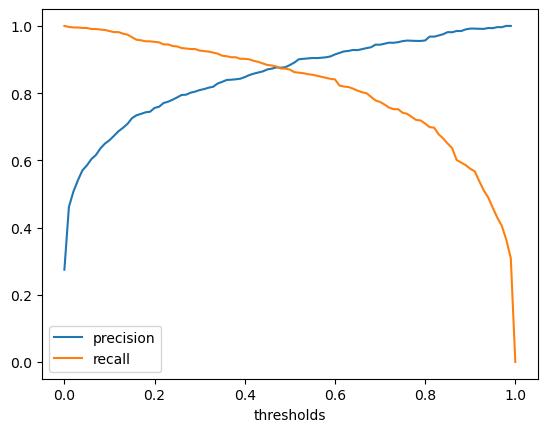

In [14]:
plt.plot(thresholds,pr,label='precision')
plt.plot(thresholds,rc,label='recall')
plt.xlabel('thresholds')
plt.legend()

In [21]:
#F1-Score
F1_scores = {}
def get_F1(p,r):
    return 2*p*r/(p+r)
for v in range(len(thresholds)):
    F1_scores[thresholds[v]] = get_F1(pr[v],rc[v])

    
F1_scores = pd.Series(F1_scores)
F1_scores[F1_scores==F1_scores.max()]

0.52    0.880375
dtype: float64

In [59]:
#Cross-Validation
n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
dv = DictVectorizer(sparse=False)
scores = []

    
   
    
for train_idx,val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
      
    train_dicts = df_train[categorical+numerical].to_dict(orient='records')
    val_dicts = df_val[categorical+numerical].to_dict(orient='records')
    X_train = dv.fit_transform(train_dicts)
    X_val = dv.transform(val_dicts)
    
    y_train = df_train['above_average'].values
    y_val = df_val['above_average'].values
    model = LogisticRegression(solver='liblinear',max_iter =1000, C=1.0).fit(X_train,y_train)
        
    y_pred = model.predict_proba(X_val)[:,1]
        
    auc = roc_auc_score(y_val,y_pred)
        
    scores.append(auc)
        
    
np.std(scores).round(3)

0.003

In [61]:
#Hyperparametertunning
for C in tqdm([0.01, 0.1, 0.5, 10]):
    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
    scores = []
    
    for train_idx,val_idx in kf.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
      
        train_dicts = df_train[categorical+numerical].to_dict(orient='records')
        val_dicts = df_val[categorical+numerical].to_dict(orient='records')
        X_train = dv.fit_transform(train_dicts)
        X_val = dv.transform(val_dicts)
    
        y_train = df_train['above_average'].values
        y_val = df_val['above_average'].values
        model = LogisticRegression(solver='liblinear',max_iter =1000, C=C).fit(X_train,y_train)

        y_pred = model.predict_proba(X_val)[:,1]

        auc = roc_auc_score(y_val,y_pred)

        scores.append(auc)
    
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))
        


  0%|          | 0/4 [00:00<?, ?it/s]

C=0.01 0.952 +- 0.002
C=0.1 0.972 +- 0.002
C=0.5 0.979 +- 0.004
C=10 0.984 +- 0.003
